In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
df.corr

<bound method DataFrame.corr of     day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fir

In [8]:
%matplotlib inline

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [10]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [11]:

df.isnull()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,False,False,False,False,False,False,False,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,False,False,False,False,False,False,False
244,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df[df.isnull().any(axis=1)]  #check each column in a row isnull give boolean dataframe and any filters only tru null comuns

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


dataset is converted into two sets based on region from 122 th index

we make a new column ie region
1:bejai region
2: sidi-bel

In [13]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [15]:
df['Region'].astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
241    1
242    1
243    1
244    1
245    1
Name: Region, Length: 246, dtype: int64

In [16]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [17]:
df=df.dropna().reset_index(drop=True)

In [18]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [19]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [20]:
df.drop(122).reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [22]:
#3FIX SPACES IN COLUMNS NAME

df.columns=df.columns.str.strip() #give withe space i mean strips
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:

df['Temperature']=df['Temperature'].str.replace('Temperature','0')
df['Temperature'].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', '0', '38', '39', '40', '42'], dtype=object)

In [24]:
#3CHANGE REQUERED COLUMNS AS INT
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [25]:
df['day'].unique()
df['day']=df['day'].str.replace('day','0')
df['day'].unique()
df['year'].unique()
df['year']=df['year'].str.replace('year','0')
df['year'].unique()

array(['2012', '0'], dtype=object)

In [26]:
df['month'].unique()
df['month']=df['month'].str.replace('month','0')
df['month'].unique()

array(['06', '07', '08', '09', '0'], dtype=object)

In [27]:
df['RH'].unique()
df['RH']=df['RH'].str.replace('RH','0')
df['month'].unique()
df['year'].unique()
df['Ws']=df['Ws'].str.replace('Ws','0')
df['Ws'].unique()

array(['18', '13', '22', '16', '14', '15', '12', '19', '21', '20', '17',
       '26', '11', ' 0', '10', '9', '8', '6', '29'], dtype=object)

In [28]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 28.7+ KB


In [30]:
##CHANGING THE OTHER COLUM TO FLOAT DTYPE
objects=[feature for feature in df.columns if df[feature].dtypes=='O']
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [31]:
cols_to_fix = ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')  ##CONVERTED STRING IE NON NUMERIC TO NA

In [32]:
for col in cols_to_fix:
    df[col]=df[col].fillna('0')

In [33]:
df['Rain'].unique()

array([0.0, 1.3, 13.1, 2.5, 0.2, 1.2, 0.5, 3.1, 0.7, 0.6, 0.3, 0.1, 0.4,
       1.0, 1.4, 0.8, 16.8, 7.2, 10.1, 3.8, 0.9, 1.8, 4.6, 8.3, 5.8, '0',
       4.0, 2.0, 4.7, 8.7, 4.5, 1.1, 1.7, 2.2, 6.0, 1.9, 2.9, 4.1, 6.5,
       4.4], dtype=object)

In [34]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.7+ KB


In [36]:
df.to_csv('algeria_clean.csv',index=False)

In [37]:
df_copy=df

In [38]:
df_copy.corr

<bound method DataFrame.corr of      day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
239   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
240   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
241   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
242   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
243   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8

In [39]:
df_copy=df.drop(['day','month','year'],axis=1)

In [40]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [41]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [47]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

AttributeError: Can only use .str accessor with string values!

In [43]:
df_copy['Classes'].unique()

array([0, 1])

In [44]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [45]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1   RH           244 non-null    int64  
 2   Ws           244 non-null    int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    float64
 10  Classes      244 non-null    int64  
 11  Region       244 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 23.0 KB


In [46]:
df_copy['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [48]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


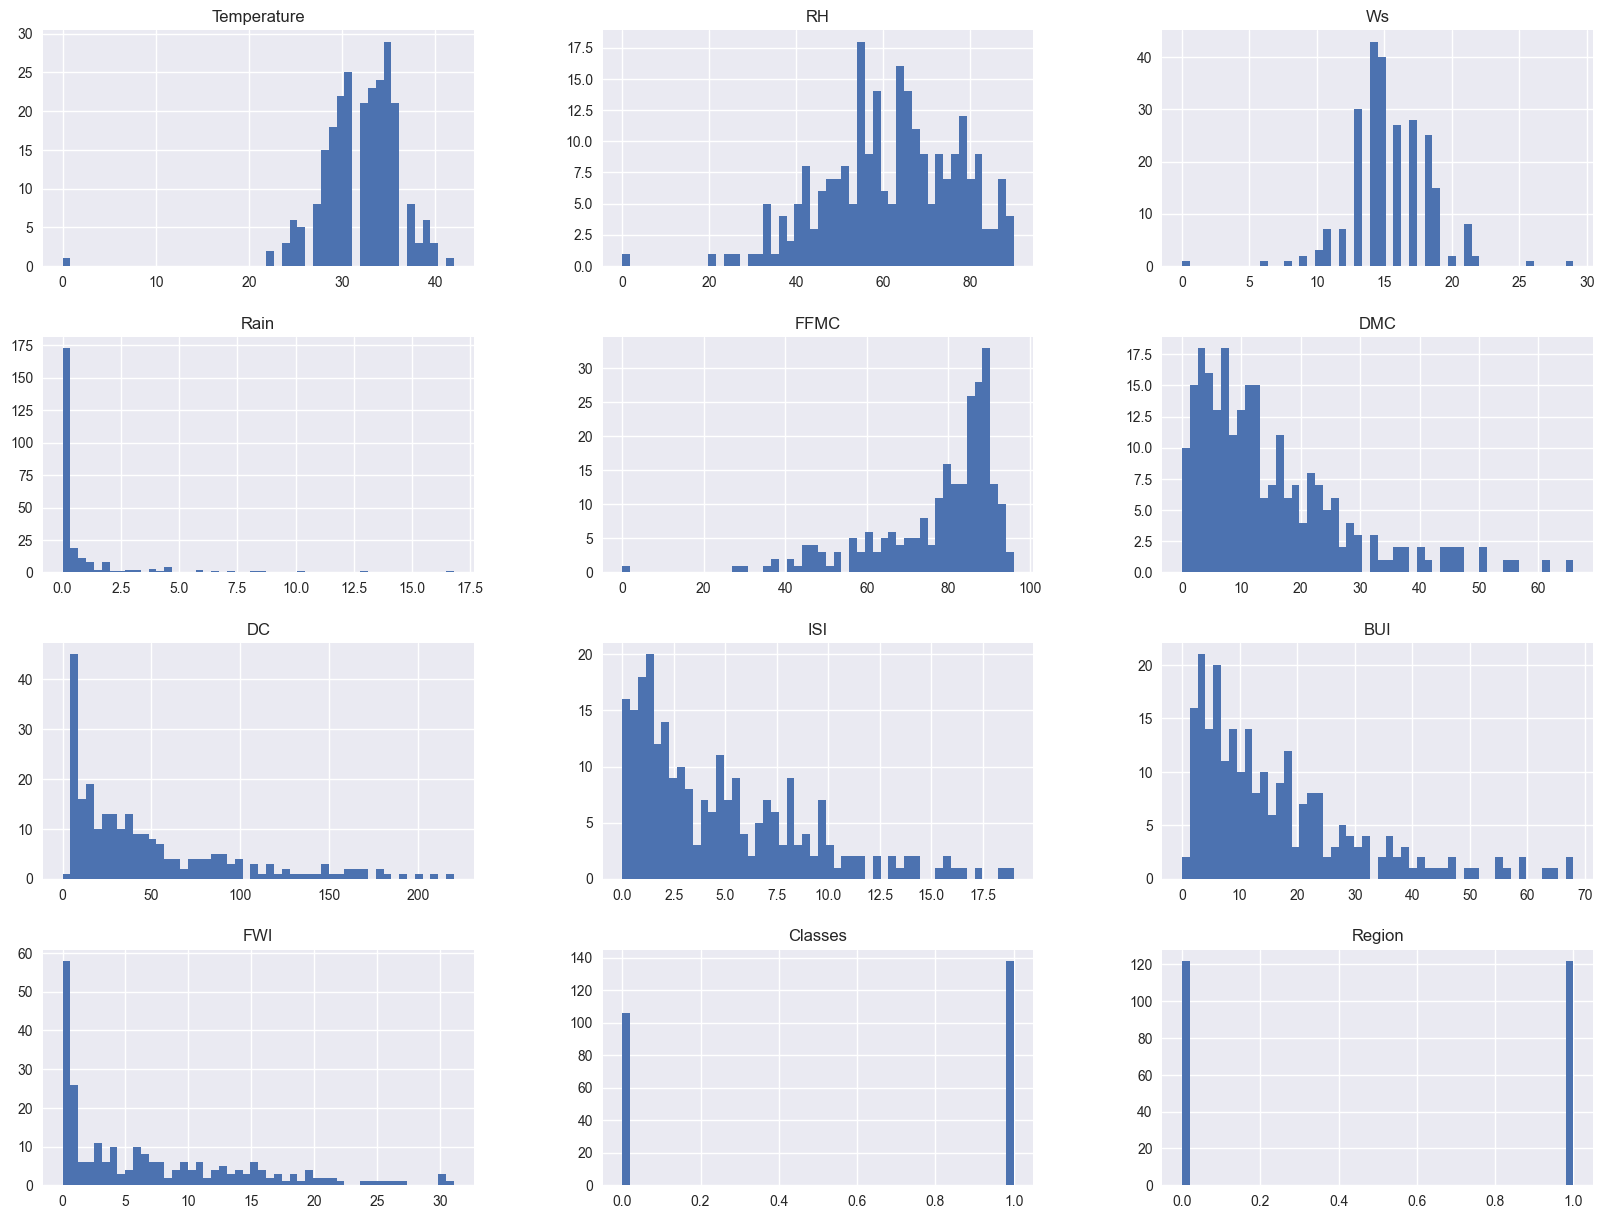

In [50]:
##plot density plot for all features

plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [54]:
###PERCENTAGE FOR PYCHARTT

percentage=df_copy['Classes'].value_counts(normalize=True)*100

([<matplotlib.patches.Wedge at 0x20bebc1b0b0>,
 [Text(-0.22500729230969246, 1.0767412495151567, 'fire'),
  Text(0.22500725808384633, -1.0767412566673527, 'not fire')])

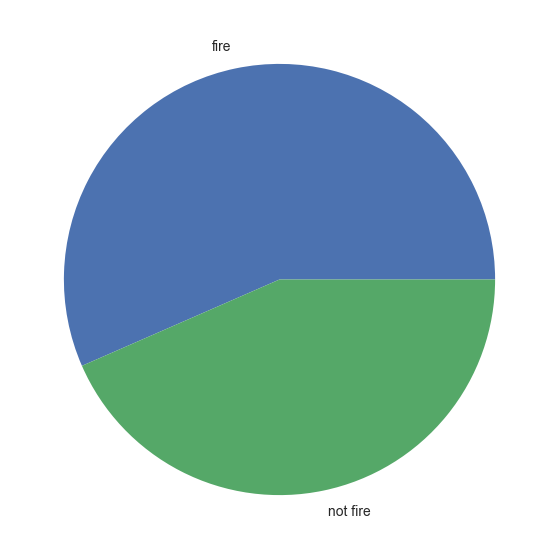

In [55]:
classLabels=['fire','not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classLabels)

In [56]:
##CORRELATION
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.418807,-0.068453,-0.271674,0.717924,0.458459,0.359201,0.559660,0.435670,0.521645,0.420093,0.202146
RH,-0.418807,1.000000,0.308634,0.221023,-0.503028,-0.373777,-0.201492,-0.642489,-0.321329,-0.544372,-0.431302,-0.404745
Ws,-0.068453,0.308634,1.000000,0.169792,-0.038749,0.024579,0.096570,0.032367,0.054569,0.050642,-0.084599,-0.191830
Rain,-0.271674,0.221023,0.169792,1.000000,-0.505509,-0.286006,-0.295656,-0.344668,-0.297084,-0.322251,-0.379758,-0.041485
FFMC,0.717924,-0.503028,-0.038749,-0.505509,1.000000,0.593340,0.499969,0.721035,0.582209,0.671439,0.707117,0.188378
DMC,0.458459,-0.373777,0.024579,-0.286006,0.593340,1.000000,0.876510,0.682220,0.982349,0.876332,0.578790,0.186281
DC,0.359201,-0.201492,0.096570,-0.295656,0.499969,0.876510,1.000000,0.511014,0.942242,0.740555,0.505457,-0.082657
ISI,0.559660,-0.642489,0.032367,-0.344668,0.721035,0.682220,0.511014,1.000000,0.646042,0.923164,0.727968,0.257268
BUI,0.435670,-0.321329,0.054569,-0.297084,0.582209,0.982349,0.942242,0.646042,1.000000,0.858528,0.579841,0.084159
FWI,0.521645,-0.544372,0.050642,-0.322251,0.671439,0.876332,0.740555,0.923164,0.858528,1.000000,0.713357,0.192451


<Axes: >

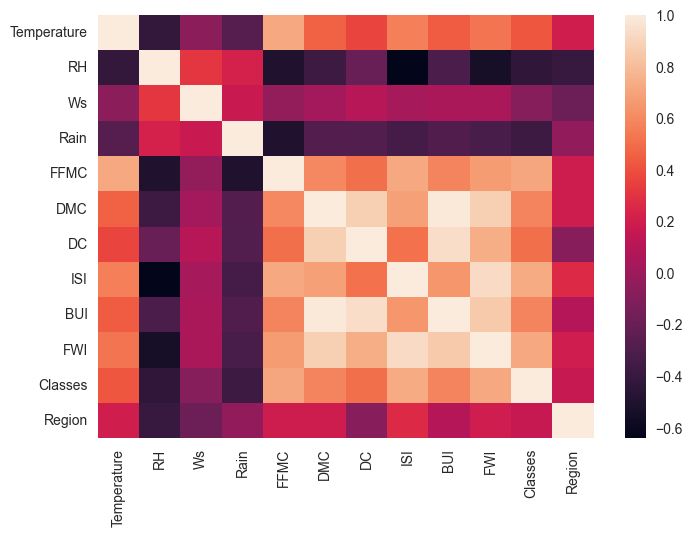

In [57]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

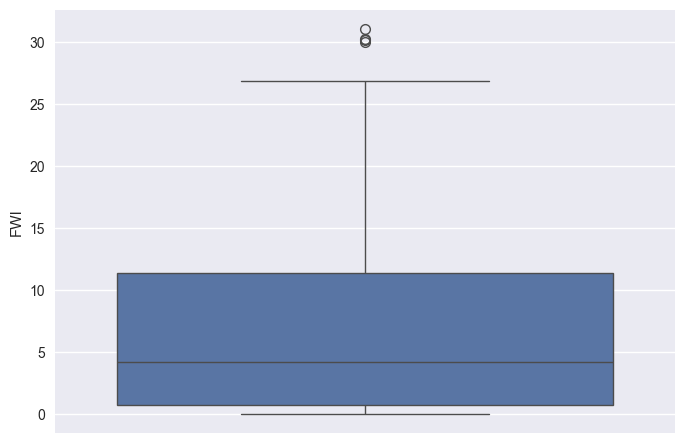

In [60]:
##3BOX PLOTS
sns.boxplot(df['FWI'])

- Find Column 'month' in DataFrame df:
- It goes row-by-row and reads values from the 'month' column to decide where to place bars on X-axis.
- Apply hue='Classes':
- It groups data within each 'month' by the 'Classes' column.
- Then it counts how many rows exist for each unique 'Classes' value within each month.
- Example:


Text(0.5, 1.0, 'analysis of sidibael region')

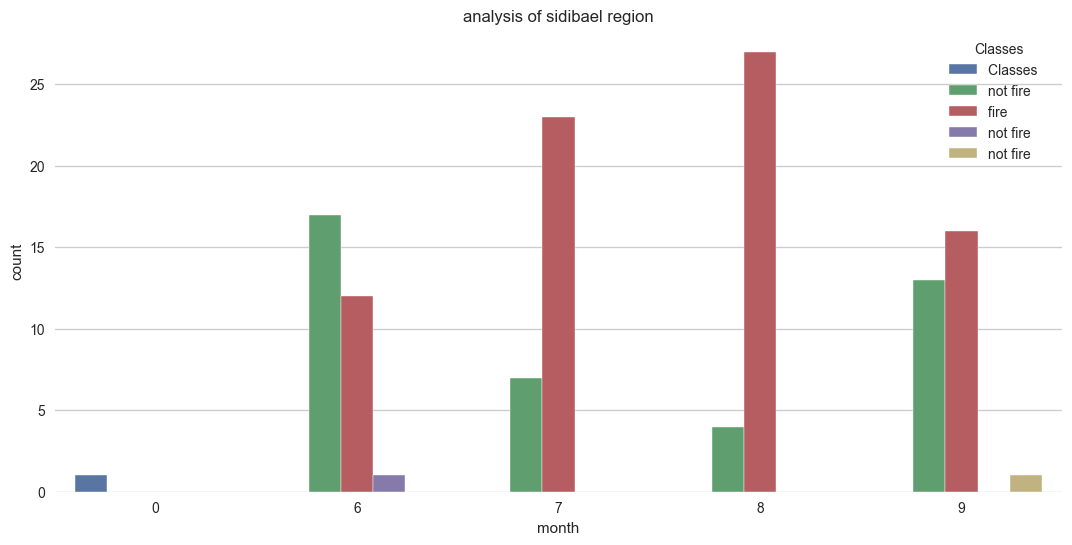

In [68]:
##MONTHLY FIRE ANALYISIS
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp) 
plt.title('analysis of sidibael region')

Text(0.5, 1.0, 'analysis of BAJAI region')

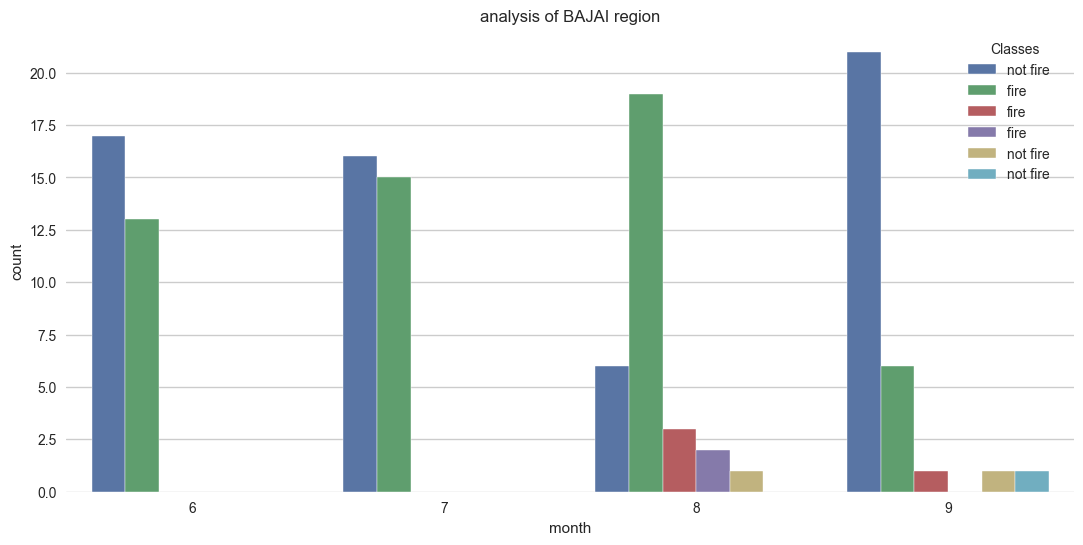

In [69]:
dftemp=df.loc[df['Region']==0]   #createes subset with only boolean values
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp) 
plt.title('analysis of BAJAI region')

MOST OF THE FIRE OCCURED IIN AUGUST REGION

Text(0.5, 1.0, 'analysis of sidibael region')

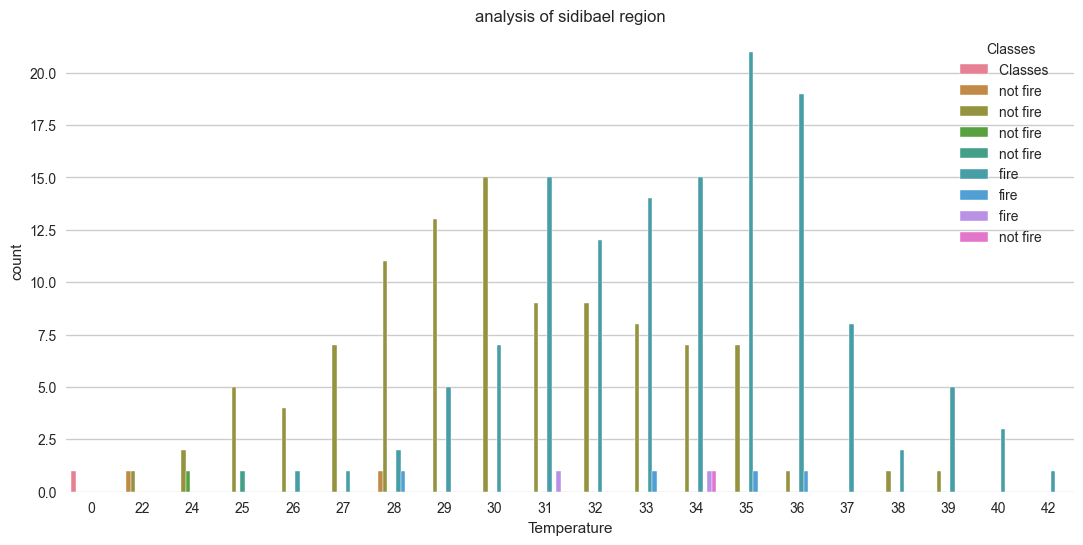

In [71]:
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='Temperature',hue='Classes',data=df) 
plt.title('analysis of sidibael region')

Text(0.5, 1.0, 'analysis of bajai region')

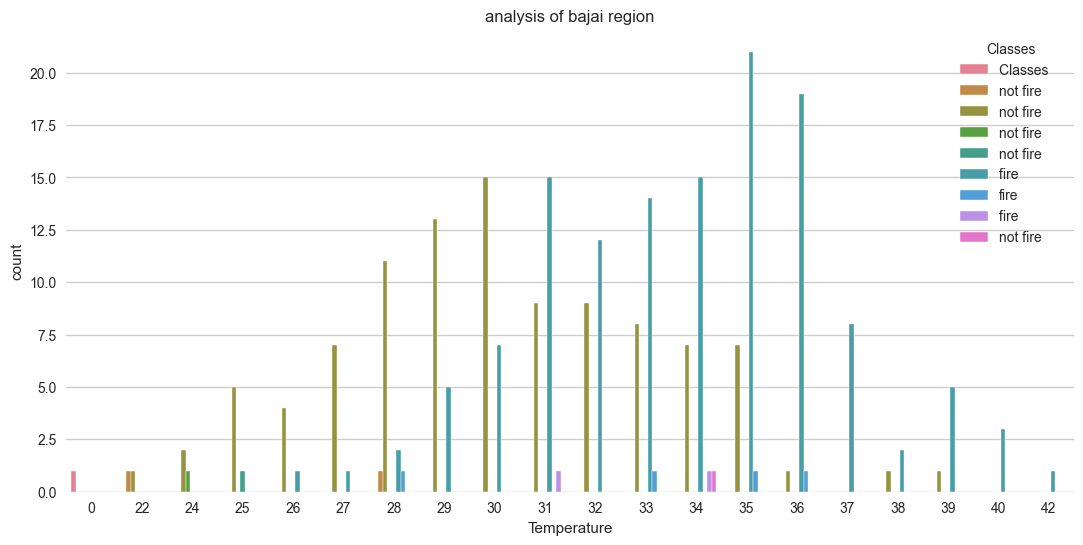

In [72]:
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='Temperature',hue='Classes',data=df) 
plt.title('analysis of bajai region')

FIRE OCCURED MOXT AT 35 DEG

Text(0.5, 1.0, 'analysis of sidibael region')

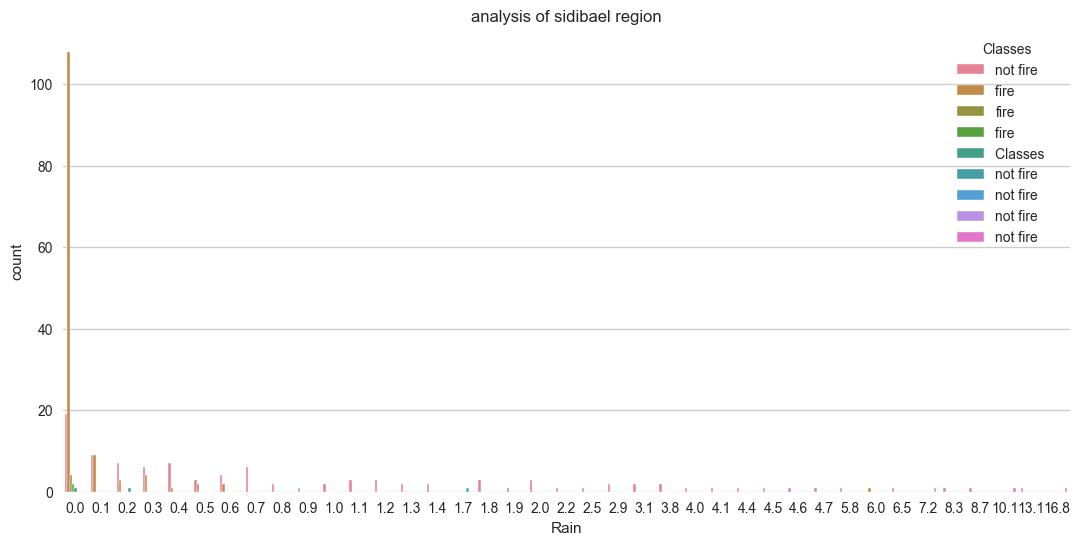

In [73]:
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='Rain',hue='Classes',data=df) 
plt.title('analysis of sidibael region')